In [1]:
from hw_demo_estimation import etl, graph_manipulation as gm, data_viz as dv
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np

# Demography Estimation Homework


In [2]:
nodes, edges = etl.load_and_select_profiles_and_edges()

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


In [3]:
G=  gm.create_graph_from_nodes_and_edges(nodes, edges)

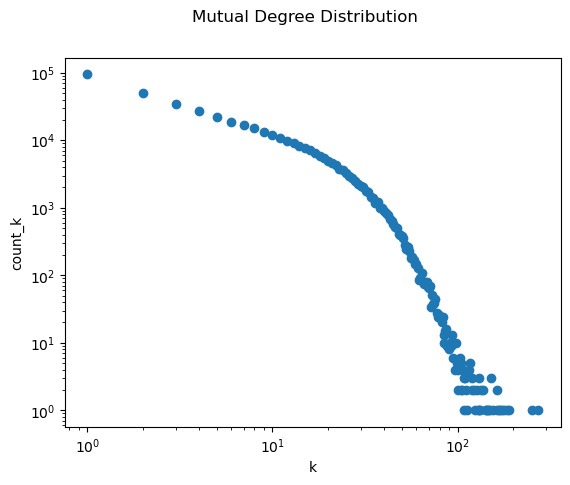

In [6]:
dv.plot_degree_distribution(G)

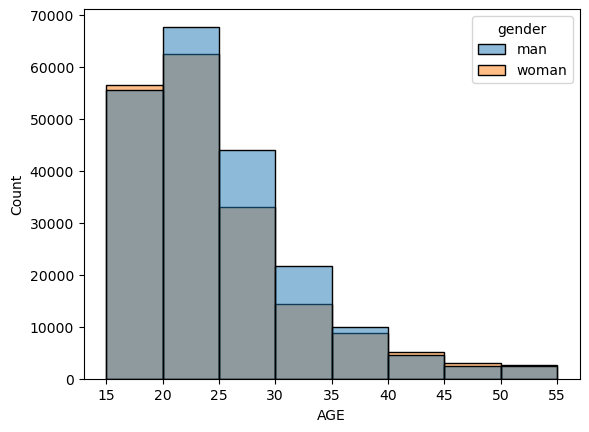

In [7]:
# descriptive analytics of the nodes
# age distribution by gender
dv.plot_age_distribution_by_gender(nodes)

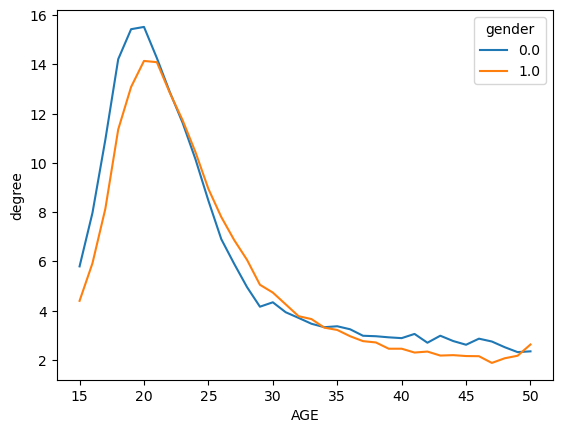

In [8]:
dv.plot_node_degree_by_gender(nodes, G)

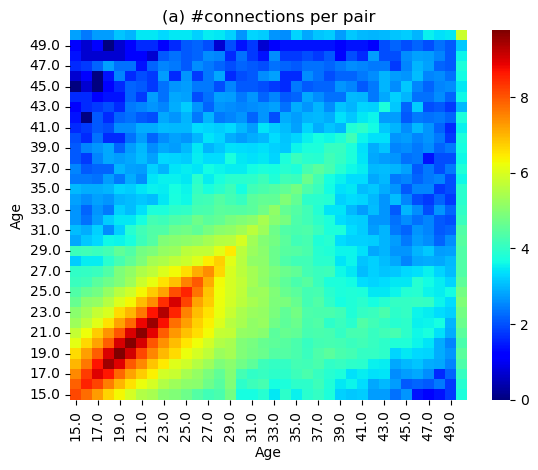

In [5]:
edges_w_features = gm.add_node_features_to_edges(nodes, edges)
dv.plot_age_relations_heatmap(edges_w_features)
# THE END

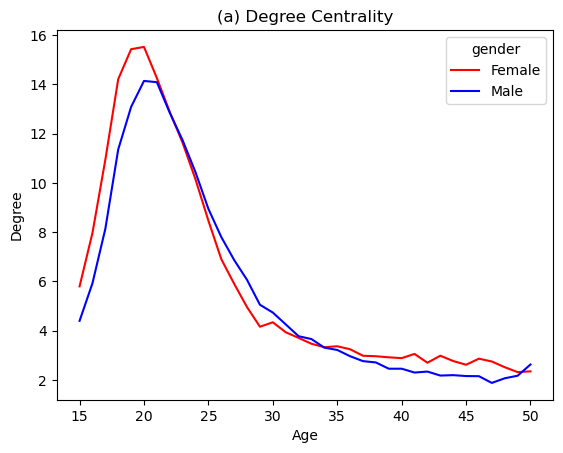

In [42]:
def plot_node_degree_by_gender(nodes, G):
    """Plot the average of node degree across age and gender"""
    nodes_w_degree = nodes.set_index("user_id").merge(
        pd.Series(dict(G.degree)).to_frame(),
        how="left",
        left_index=True,
        right_index=True,
    )
    nodes_w_degree = nodes_w_degree.rename({0: "degree"}, axis=1)
    nodes_w_degree['gender'].replace([0.0,1.0],['Female','Male'],inplace=True)
    plot_df = (
        nodes_w_degree.groupby(["AGE", "gender"]).agg({"degree": "mean"}).reset_index()
    )
    

    ax=sns.lineplot(data=plot_df, x="AGE", y="degree", hue="gender", palette=['red', 'blue'])
    ax.set_xlabel("Age")
    ax.set_ylabel("Degree")
    ax.set_title("(a) Degree Centrality")

plot_node_degree_by_gender(nodes, G)

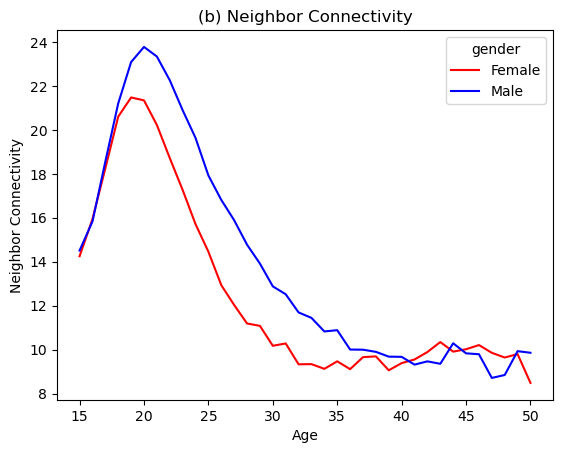

In [36]:
def plot_node_neighbor_conn_by_gender(nodes,G):
    """Plots neihgbor connectivity: the average degree of neighbors of a specific user"""
    nodes_w_neighbor_conn=nodes
    
    #using the inbuil nx.average_neighbor_degree function, and mapping it to each node
    nodes_w_neighbor_conn=nodes_w_neighbor_conn.assign(neighbor_conn=nodes_w_neighbor_conn.user_id.map(nx.average_neighbor_degree(G)))
    nodes_w_neighbor_conn['gender'].replace([0.0,1.0],['Female','Male'],inplace=True)
    
    plot_df = (
        nodes_w_neighbor_conn.groupby(["AGE", "gender"]).agg({"neighbor_conn": "mean"}).reset_index()
    )
    ax=sns.lineplot(data=plot_df, x="AGE", y="neighbor_conn", hue='gender', palette=['red', 'blue'])
    ax.set_xlabel("Age")
    ax.set_ylabel("Neighbor Connectivity")
    ax.set_title("(b) Neighbor Connectivity")

    
plot_node_neighbor_conn_by_gender(nodes,G)

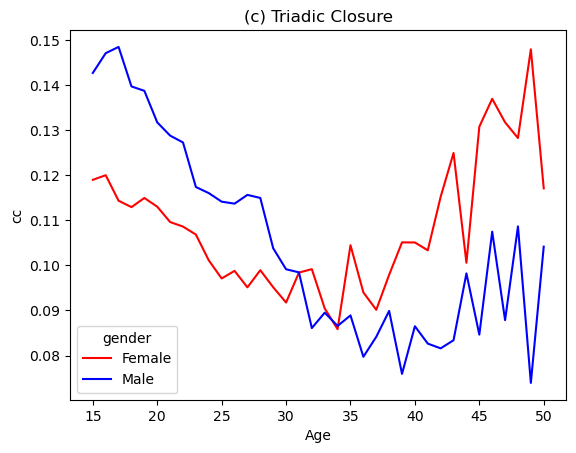

In [27]:
def plot_node_triadic_clos_by_gender(nodes, G):
    """Plots triadic cluster: the local clustering coefficient  (cc) of each user"""   
    nodes_w_triadic_clos = nodes 
    nodes_w_triadic_clos = nodes_w_triadic_clos.assign(triadic_clos=nodes_w_triadic_clos.user_id.map(nx.clustering(G)))
    nodes_w_triadic_clos['gender'].replace([0.0,1.0],['Female','Male'],inplace=True)

    plot_df = (
        nodes_w_triadic_clos.groupby(["AGE", "gender"]).agg({"triadic_clos": "mean"}).reset_index()
    )
    ax=sns.lineplot(data=plot_df, x="AGE", y="triadic_clos", hue='gender', palette=['red', 'blue'])
    ax.set_xlabel("Age")
    ax.set_ylabel("cc")
    ax.set_title("(c) Triadic Closure")

plot_node_triadic_clos_by_gender(nodes, G)
    


In [28]:
nodes_w_triadic_clos = nodes 
nodes_w_triadic_clos = nodes_w_triadic_clos.assign(triadic_clos=nodes_w_triadic_clos.user_id.map(nx.clustering(G)))
nodes_w_triadic_clos['gender'].replace([0.0,1.0],['Female','Male'],inplace=True)

In [ ]:
edges_w_features = gm.add_node_features_to_edges(nodes, edges)

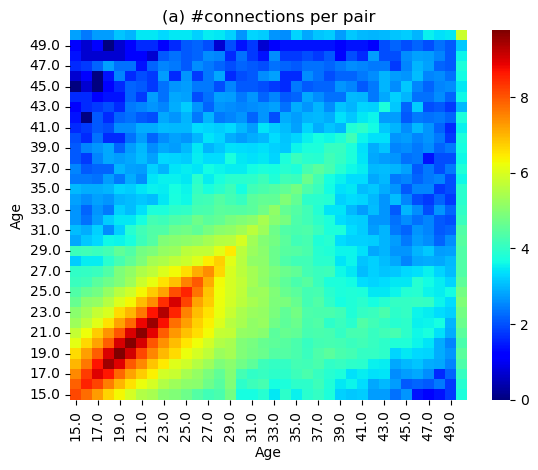

In [37]:
def plot_age_relations_heatmap(edges_w_features):
    """Plot a heatmap that represents the distribution of edges"""
    plot_df = edges_w_features.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    plot_df_w_w = plot_df.loc[(0, 0)].reset_index()
    plot_df_heatmap = plot_df_w_w.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    ax=sns.heatmap(plot_df_heatmap_logged, cmap='jet')
    ax.invert_yaxis()
    ax.set_xlabel("Age")
    ax.set_ylabel("Age")
    ax.set_title("(a) #connections per pair")
plot_age_relations_heatmap(edges_w_features)

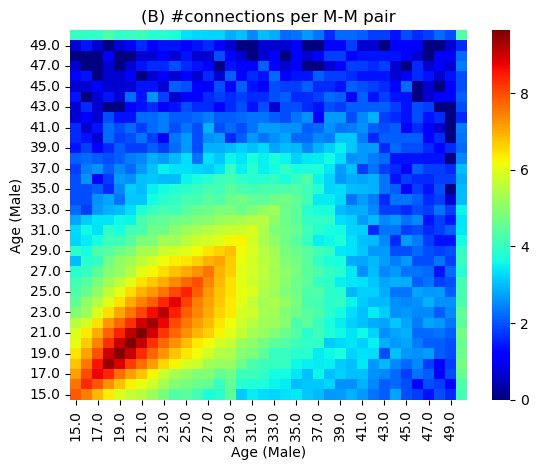

In [36]:
def plot_age_relations_heatmap_M_M(edges_w_features):
    """Plot a heatmap that represents the distribution of edges for Male-Male pairs"""

    #we filter out the input dataframe with only Male-Male pairs
    edges_w_features_M_M=edges_w_features.loc[(edges_w_features['gender_x']==1.0) & (edges_w_features['gender_y']==1.0)]

    plot_df = edges_w_features_M_M.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    #plot_df_w_w = plot_df.loc[(0, 0)].reset_index() -> not needed
    plot_df_heatmap = plot_df.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    ax=sns.heatmap(plot_df_heatmap_logged, cmap='jet')
    ax.invert_yaxis()
    ax.set_xlabel("Age (Male)")
    ax.set_ylabel("Age (Male)")
    ax.set_title("(B) #connections per M-M pair")
plot_age_relations_heatmap_M_M(edges_w_features)

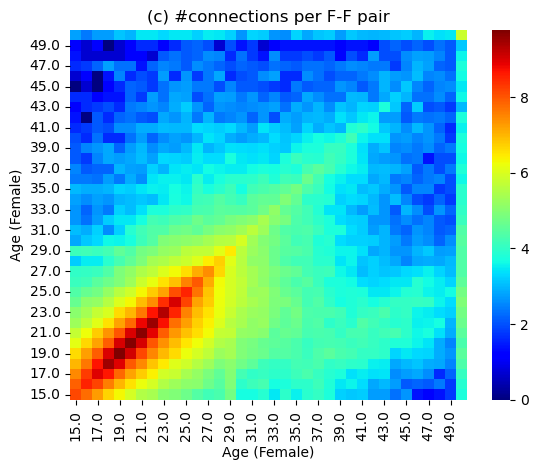

In [39]:
def plot_age_relations_heatmap_F_F(edges_w_features):
    """Plot a heatmap that represents the distribution of edges for Female-Female pairs"""

    #we filter out the input dataframe with only Female-Female pairs
    edges_w_features_F_F=edges_w_features.loc[(edges_w_features['gender_x']==0.0) & (edges_w_features['gender_y']==0.0)]

    plot_df = edges_w_features_F_F.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    #plot_df_w_w = plot_df.loc[(0, 0)].reset_index() -> not needed
    plot_df_heatmap = plot_df.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    ax=sns.heatmap(plot_df_heatmap_logged, cmap='jet')
    ax.invert_yaxis()
    ax.set_xlabel("Age (Female)")
    ax.set_ylabel("Age (Female)")
    ax.set_title("(c) #connections per F-F pair")
plot_age_relations_heatmap_F_F(edges_w_features)

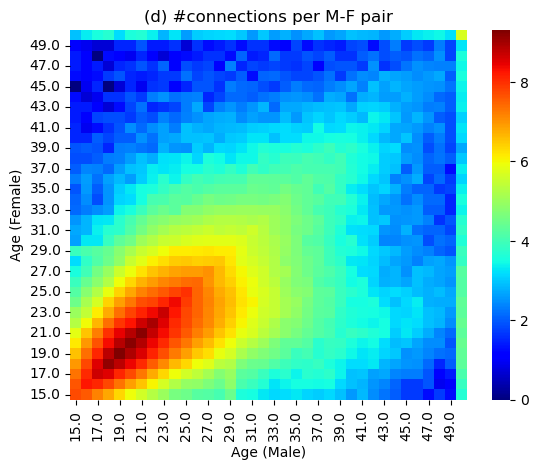

In [44]:
def plot_age_relations_heatmap_M_F(edges_w_features):
    """Plot a heatmap that represents the distribution of edges for Male-Female pairs"""

    #we filter out the input dataframe with only Female-Female pairs
    edges_w_features_M_F=edges_w_features.loc[(edges_w_features['gender_x'] != edges_w_features['gender_y'])]

    plot_df = edges_w_features_M_F.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    #plot_df_w_w = plot_df.loc[(0, 0)].reset_index() -> not needed
    plot_df_heatmap = plot_df.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    ax=sns.heatmap(plot_df_heatmap_logged, cmap='jet')
    ax.invert_yaxis()
    ax.set_xlabel("Age (Male)")
    ax.set_ylabel("Age (Female)")
    ax.set_title("(d) #connections per M-F pair")
plot_age_relations_heatmap_M_F(edges_w_features)

In [6]:
edges_w_features_M_F=edges_w_features.loc[(edges_w_features['gender_x'] != edges_w_features['gender_y'])]
edges_w_features_M_F

,smaller_id,greater_id,AGE_x,gender_x,AGE_y,gender_y
0,1,4,26.0,1.0,26.0,0.0
2,1,7,26.0,1.0,22.0,0.0
3,1,10,26.0,1.0,22.0,0.0
4,1,11,26.0,1.0,22.0,0.0
6,5,176,26.0,1.0,23.0,0.0
...,...,...,...,...,...,...
1992402,1631566,1632724,31.0,0.0,34.0,1.0
1992404,1631689,1632704,26.0,0.0,30.0,1.0
1992407,1631897,1632683,50.0,0.0,43.0,1.0
1992411,1632689,1632782,31.0,0.0,NaN,NaN


In [7]:
edges_w_features

,smaller_id,greater_id,AGE_x,gender_x,AGE_y,gender_y
0,1,4,26.0,1.0,26.0,0.0
1,1,5,26.0,1.0,26.0,1.0
2,1,7,26.0,1.0,22.0,0.0
3,1,10,26.0,1.0,22.0,0.0
4,1,11,26.0,1.0,22.0,0.0
...,...,...,...,...,...,...
1992409,1632157,1632753,36.0,0.0,37.0,0.0
1992410,1632204,1632745,46.0,0.0,50.0,0.0
1992411,1632689,1632782,31.0,0.0,NaN,NaN
1992412,1632779,1632792,NaN,NaN,35.0,0.0


In [64]:
#Figure 6 step1: F-F relations
def pivot_F_F(edges_w_features):
    edges_w_features_F_F=edges_w_features.loc[(edges_w_features['gender_x']==0.0) & (edges_w_features['gender_y']==0.0)]

    df_F_F= edges_w_features_F_F.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    #creating pivot table
    df_F_F_pivot=df_F_F.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    #adding total 2
    df_F_F_pivot['F_total'] = df_F_F_pivot.sum(axis=1)

    return df_F_F_pivot

# step 2: F-M relations:
def pivot_F_M(edges_w_features):
    edges_w_features_F_M=edges_w_features.loc[(edges_w_features['gender_x']==0.0) & (edges_w_features['gender_y']==1.0)]

    df_F_M= edges_w_features_F_M.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    #creating pivot table
    df_F_M_pivot=df_F_M.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    #adding total 2
    df_F_M_pivot['M_total'] =df_F_M_pivot.sum(axis=1)

    return df_F_M_pivot


In [104]:
#Female relations to proportions
def pivot_F_proportions(df_F_F_pivot, df_F_M_pivot):
    df_F_F_proportion=df_F_F_pivot
    #to include all relations of Females
    df_F_F_proportion['T_total'] = df_F_F_pivot['F_total'] + df_F_M_pivot['M_total']

    df_F_F_proportion =  df_F_F_proportion.loc[:,15.0:50.0].div( df_F_F_proportion['T_total'],axis=0)
    return df_F_F_proportion

df_pivot_F_proportions = pivot_F_proportions(pivot_F_F(edges_w_features),pivot_F_M(edges_w_features))

#creating generations, but because of the smaller sample (ages between 15-50 we declared different ranges
# (same = +- 5 years, older = +10 to +20, younger = -10 to -20 years old)
def F_F_gen_proportions(pivot_F_proportions):
    
    df_pivot_F_proportions = pivot_F_proportions
    same_gen={}
    older_gen={}
    younger_gen={}

    for age in df_pivot_F_proportions.index:
            same_gen[age]= sum(df_pivot_F_proportions.loc[age,max(age-5,15):min(age+5,50)])

    for age in df_pivot_F_proportions.index:
        if age <=40:
            older_gen[age]= sum(df_pivot_F_proportions.loc[age,age+10:min(age+20,50)])
        #because data is out of the sample
        else: 
            older_gen[age] = 0

    for age in df_pivot_F_proportions.index:
        if age >=25:
            younger_gen[age]= sum(df_pivot_F_proportions.loc[age,max(age-20,15):max(age-10,15)])
        #because data is out of the sample
        else: 
            younger_gen[age] = 0
    
    df_pivot_F_proportions['same_gen'] = same_gen.values()
    df_pivot_F_proportions['older_gen'] = older_gen.values()
    df_pivot_F_proportions['younger_gen'] = younger_gen.values()
    return (df_pivot_F_proportions)


In [105]:
x=F_F_gen_proportions(df_pivot_F_proportions)
x

AGE_y,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,...,44.0,45.0,46.0,47.0,48.0,49.0,50.0,same_gen,older_gen,younger_gen
AGE_x,,,,,,,,,,,,,,,,,,,,,
15.0,0.150642,0.102085,0.062236,0.035055,0.024499,0.016758,0.010952,0.009500,0.006597,0.006158,...,0.000396,0.000572,0.000132,0.000088,0.000132,0.000220,0.001847,0.391274,0.030128,0.000000
16.0,0.064735,0.125245,0.089362,0.048607,0.026963,0.017345,0.012077,0.009369,0.006163,0.004796,...,0.000348,0.000174,0.000199,0.000174,0.000249,0.000124,0.001168,0.384334,0.020998,0.000000
17.0,0.027825,0.062470,0.124907,0.092336,0.039244,0.021703,0.013913,0.009475,0.005944,0.005280,...,0.000194,0.000227,0.000259,0.000194,0.000065,0.000130,0.000923,0.391873,0.013540,0.000000
18.0,0.012530,0.023649,0.066003,0.148159,0.085385,0.031901,0.019382,0.010645,0.007292,0.004707,...,0.000181,0.000214,0.000237,0.000192,0.000181,0.000124,0.000858,0.404947,0.010453,0.000000
19.0,0.007049,0.012538,0.025150,0.074205,0.161487,0.078283,0.031586,0.016856,0.009910,0.006975,...,0.000232,0.000279,0.000241,0.000232,0.000158,0.000121,0.000827,0.424039,0.010225,0.000000
20.0,0.004411,0.007612,0.012774,0.027090,0.079669,0.160294,0.080742,0.028476,0.015926,0.009924,...,0.000420,0.000420,0.000342,0.000283,0.000166,0.000107,0.000712,0.433437,0.009075,0.000000
21.0,0.003197,0.005264,0.008842,0.015823,0.030720,0.080666,0.165147,0.074405,0.028510,0.015329,...,0.000720,0.000514,0.000370,0.000411,0.000288,0.000175,0.000884,0.442122,0.010261,0.000000
22.0,0.002461,0.003540,0.005512,0.008826,0.016673,0.030257,0.084481,0.167920,0.075994,0.028047,...,0.000590,0.000628,0.000414,0.000439,0.000477,0.000226,0.001306,0.452725,0.011827,0.000000
23.0,0.002403,0.003261,0.004790,0.006194,0.011638,0.017052,0.032482,0.090081,0.174717,0.077054,...,0.000796,0.000858,0.000530,0.000499,0.000421,0.000374,0.001888,0.471778,0.013245,0.000000


In [77]:
#F-F x dataframe
edges_w_features_F_F=edges_w_features.loc[(edges_w_features['gender_x']==0.0) & (edges_w_features['gender_y']==0.0)]

plot_df_F_F = edges_w_features_F_F.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
#creating pivot table
plot_df_F_F_pivot=plot_df_F_F.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    
plot_df_F_F_pivot

#adding total 2
plot_df_F_F_pivot['total'] = plot_df_F_F_pivot.sum(axis=1)

#calculating proportion
plot_df_F_F_pivot_percent = plot_df_F_F_pivot.loc[:,15.0:50.0].div(plot_df_F_F_pivot['total'],axis=0)
plot_df_F_F_pivot_percent

#creating generations (same = +- 5 years, older = +20 to +30, younger = -20 to -30 years old)
same_gen()
older_gen()
younger_gen()

#same generation
for age in plot_df_F_F_pivot_percent.index:
        same_gen[age]= sum(plot_df_F_F_pivot_percent.loc[age,max(age-5,15):min(age+5,50)]) 
        
same_gen



{15.0: 0.8349915524685565,
 16.0: 0.8777027410476137,
 17.0: 0.9148139745916514,
 18.0: 0.9338522413703336,
 19.0: 0.94047128614979,
 20.0: 0.9430148619957537,
 21.0: 0.933184323597066,
 22.0: 0.9264921250738676,
 23.0: 0.9158363366546534,
 24.0: 0.8979430692092067,
 25.0: 0.8778176516765727,
 26.0: 0.8500346140533056,
 27.0: 0.7996620806179097,
 28.0: 0.7561070940003909,
 29.0: 0.679862700228833,
 30.0: 0.6661295520464068,
 31.0: 0.6222935044105854,
 32.0: 0.614244741873805,
 33.0: 0.5885678391959799,
 34.0: 0.5587213342599028,
 35.0: 0.5178306092124815,
 36.0: 0.511504424778761,
 37.0: 0.5062320230105466,
 38.0: 0.4803493449781659,
 39.0: 0.4577723378212974,
 40.0: 0.49445983379501385,
 41.0: 0.40428571428571425,
 42.0: 0.4146341463414634,
 43.0: 0.42158859470468435,
 44.0: 0.3716381418092909,
 45.0: 0.4648318042813455,
 46.0: 0.4521739130434783,
 47.0: 0.35492957746478876,
 48.0: 0.4092664092664093,
 49.0: 0.4177215189873418,
 50.0: 0.4250681198910082}